<center>

# Task-02

# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.



### Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


</center>

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reading the data

In [12]:
raw_data = pd.read_csv("Data/Mall_Customers.csv")
raw_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Filtering

In [13]:
raw_data.drop(columns=["CustomerID"] , inplace=True)

In [14]:
le = LabelEncoder()
raw_data['Gender'] = le.fit_transform(raw_data['Gender'])
raw_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [17]:
raw_data.isnull().sum()
raw_data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Finding approximated better values of K using Elbow Method

In [20]:
max_clusters = 30
kmeans = [KMeans(n_clusters=i, n_init=10) for i in range(1,max_clusters)]
wcss = [kmeans[i].fit(raw_data).inertia_ for i in range(len(kmeans))]

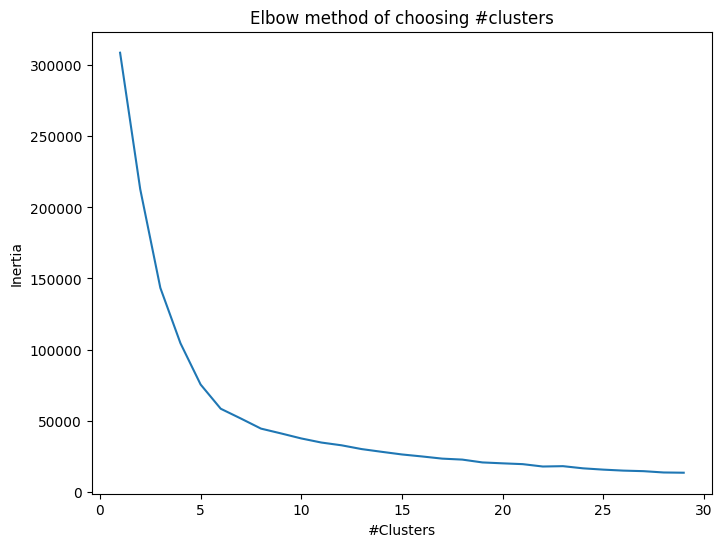

In [21]:
plt.figure(figsize=(8,6))
plt.plot(range(1,max_clusters), wcss)
plt.title('Elbow method of choosing #clusters')
plt.xlabel('#Clusters')
plt.ylabel('WCSS')
plt.show()

# Predicting cluster 

For K =  5
[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


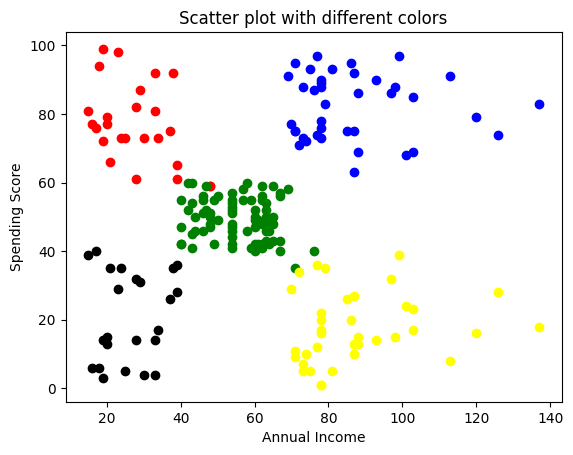

For K =  6
[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 5 4 5 2 0 4 5 2 2 2 5 2 2 5 5 5 5 5 2 5 5 2 5 5 5 2 5 5 2 2 5 5 5 5
 5 2 5 2 2 5 5 2 5 5 2 5 5 2 2 5 5 2 5 2 2 2 5 2 5 2 2 5 5 2 5 2 5 5 5 5 5
 2 2 2 2 2 5 5 5 5 2 2 2 1 2 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


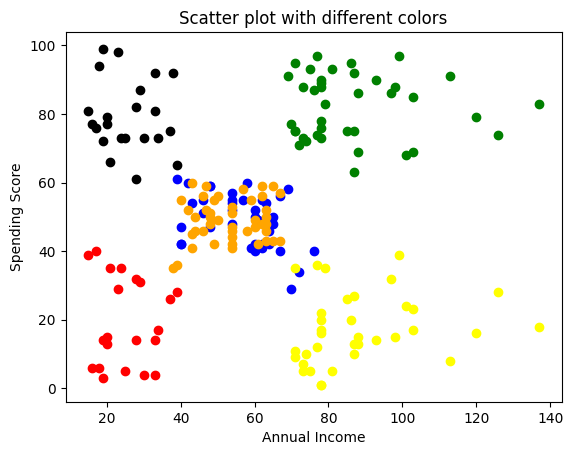

For K =  7
[4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4
 6 4 6 2 6 2 0 4 6 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 5 0 5 1 5 1 5 1 5 0 5 1 5 1 5 1 5 1 5 0 5 1 5 1 5
 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


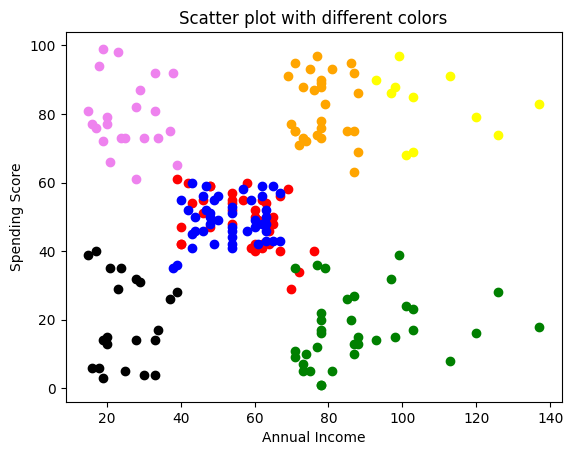

For K =  8
[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 4 1 2 5 2 1 4 5 5 5 4 5 5 4 4 4 4 4 5 4 4 5 4 4 4 5 4 4 5 5 4 4 4 4
 4 5 4 5 5 4 4 5 4 4 5 4 4 5 5 4 4 5 4 5 5 5 4 5 4 5 5 4 4 5 4 5 4 4 4 4 4
 5 5 5 5 5 4 4 4 4 5 5 5 3 5 3 5 3 0 3 0 3 5 3 0 3 0 3 0 3 0 3 5 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0
 7 0 7 0 7 0 7 0 6 0 6 0 6 0 6]


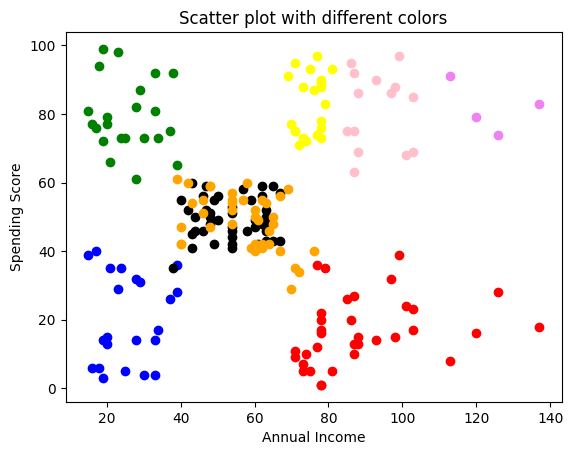

In [106]:
for i in range(5,9) :
    print("For K = ",i)
    model=KMeans(n_clusters=i)
    y=model.fit_predict(raw_data)
    print(y)
    colors = ['red', 'green', 'blue','yellow', 'black','orange', 'violet', 'pink']
    l=0
    for y_data, color in zip(y, colors):
        plt.scatter(raw_data[y==l].iloc[:, 2],raw_data[y==l].iloc[:, 3], color=color, label=f'Color {color}')
        l+=1
    # plt.legend()
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.title('Scatter plot with different colors')
    plt.show()


#### We see a good cluster fomation for k=5

# Using PCA for a Better Visualization of clusters

In [102]:
pca = PCA(n_components=2)

# Fit and transform the data
pca_result = pca.fit_transform(raw_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Print the new DataFrame
pca_df

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


For K =  5
[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


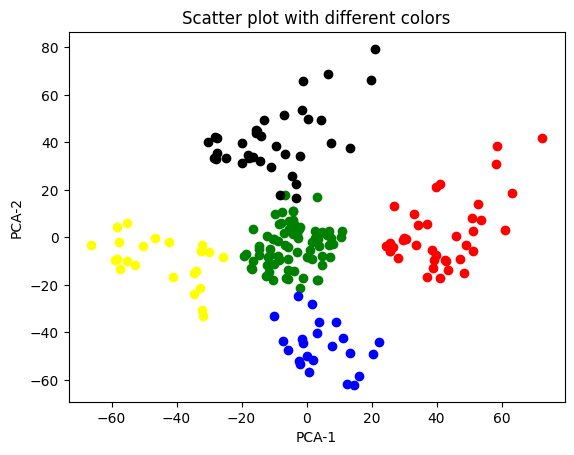

For K =  6
[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 3 4 3 0 5 4 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


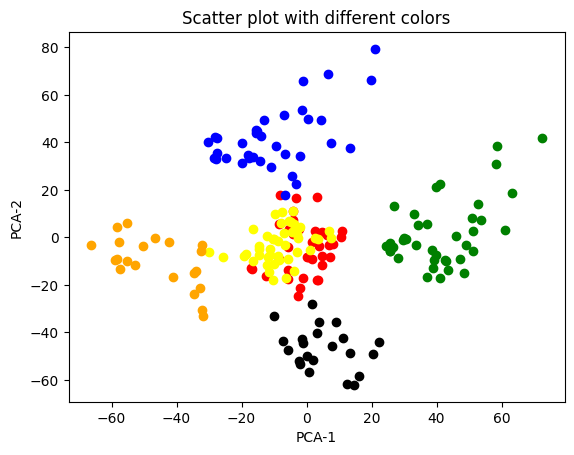

For K =  7
[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 1 0 3 5 3 0 1 5 5 5 1 5 5 1 1 1 1 1 5 1 1 5 1 1 1 5 1 1 5 5 1 1 1 1
 1 5 1 5 5 1 1 5 1 1 5 1 1 5 5 1 1 5 1 5 5 5 1 5 1 5 5 1 1 5 1 5 1 1 1 1 1
 5 5 5 5 5 1 1 1 1 5 5 5 4 2 4 2 4 2 4 2 4 5 4 2 4 2 4 2 4 2 4 5 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 6 4 6 4 6
 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4]


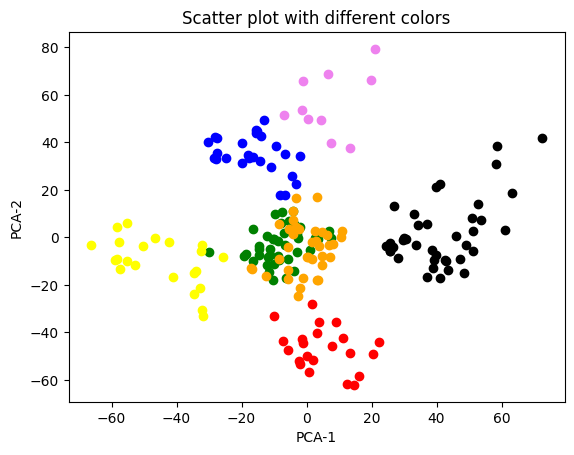

For K =  8
[7 3 7 3 7 3 6 3 6 3 6 3 6 3 6 3 7 3 6 3 7 3 6 3 6 3 7 3 7 3 6 3 6 3 6 3 6
 3 7 3 1 3 7 0 7 3 1 0 7 7 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 4 5 4 5 4 5 4 5 4 0 4 5 4 5 4 5 4 5 4 0 4 5 4 5 4
 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


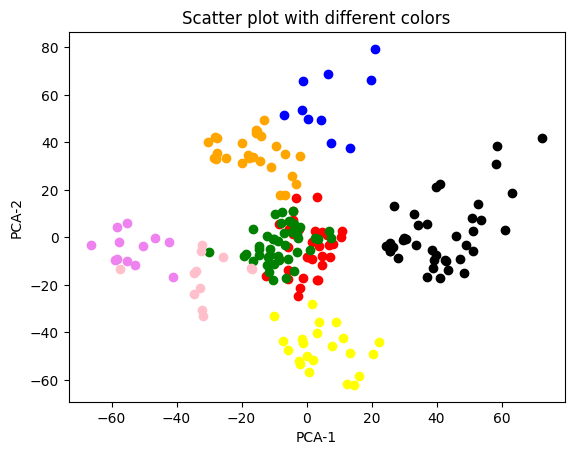

In [109]:
for i in range(5,9) :
    print("For K = ",i)
    model=KMeans(n_clusters=i)
    y=model.fit_predict(raw_data)
    print(y)
    colors = ['red', 'green', 'blue','yellow', 'black','orange', 'violet', 'pink']
    l=0
    for y_data, color in zip(y, colors):
        plt.scatter(pca_df[y==l].iloc[:, 0],pca_df[y==l].iloc[:, 1], color=color, label=f'Color {color}')
        l+=1
    # plt.legend()
    plt.xlabel('PCA-1')
    plt.ylabel('PCA-2')
    plt.title('Scatter plot with different colors')
    plt.show()

### We again see K=5 gives good result for PCA transformed data

# Interpretation

### Cluster 1  -> earning high but spending less
### cluster 2  -> average in terms of earning and spending 
### cluster 3  -> earning high and also spending high [TARGET SET]
### cluster 4  -> earning less but spending more
### Cluster 5  -> Earning less , spending less